<a href="https://colab.research.google.com/github/Many98/GLM_R2Py/blob/main/Python/01ZLMA_ex08_Binary_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 08 of the course 01ZLMA. 

# GLM for Discrete response - Binary Data Analysis (02)

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} $$ 


**Probit function:**

The CDF of the normal distribution. 
$$\pi_i = \Phi({x_i^T \beta}) $$ 


**Cauchit function:**

The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$ 


**Complementary log-log (cloglog) function:**

The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

The counter part of the cloglog function is log-log link function.

In [1]:
import numpy as np
import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot

import pandas as pd

from helpers import DiagnosticPlots ,Anova
from dfply import *  # handy module to mimic R dplyr library

sns.set_theme()

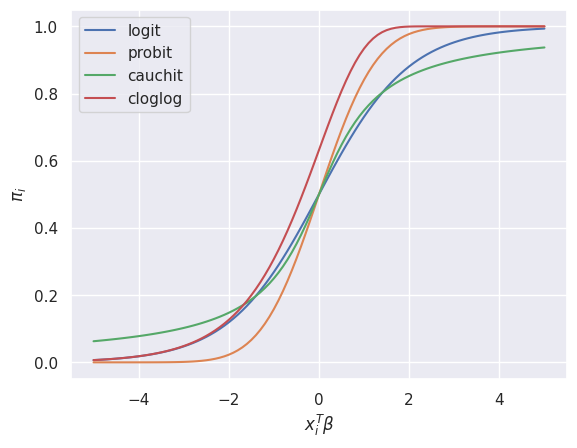

In [2]:
x = np.tile(np.linspace(-5, 5, 101), 4).reshape(4, -1)
y = []
names =[]

for i, j in enumerate(zip(("logit", "probit", "cauchit", "cloglog"), 
                (sm.genmod.families.links.Logit(), sm.genmod.families.links.probit(), 
                 sm.genmod.families.links.cauchy(), sm.genmod.families.links.CLogLog()))):
    
    y.append(j[1].inverse(x[i]))
    names.append([j[0]]*len(x[i]))
    
y = np.array(y).flatten()
n = np.array(names).flatten()

fig, ax = plt.subplots()



sns.lineplot(x='x', y='y', data=pd.DataFrame(data={'x': x.flatten(), 'y': y, 'n': n}), ax=ax, hue='n')
    

ax.legend()
ax.set_xlabel(r'$x_i^T \beta$')
ax.set_ylabel(r'$\pi_i$')
plt.show()

## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
X, y = datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

In [4]:
titanic_test.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,262.000000,262,262,206.000000,262.000000,262.000000,262,262.000000,59,262,95,19.000000,152,262
unique,NaN,262,2,NaN,NaN,NaN,234,NaN,53,3,22,NaN,112,2
top,NaN,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",male,NaN,NaN,NaN,16966,NaN,D30,S,4,NaN,"New York, NY",0
freq,NaN,1,174,NaN,NaN,NaN,3,NaN,2,183,9,NaN,13,162
mean,2.309160,NaN,NaN,29.904531,0.526718,0.377863,NaN,35.105883,NaN,NaN,NaN,158.947368,NaN,NaN
std,0.834959,NaN,NaN,15.284936,1.070884,0.883201,NaN,55.163861,NaN,NaN,NaN,102.754007,NaN,NaN
min,1.000000,NaN,NaN,0.416700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,7.000000,NaN,NaN
25%,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,66.500000,NaN,NaN
50%,3.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,15.500000,NaN,NaN,NaN,149.000000,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,250.500000,NaN,NaN


# Fast and furios solution of the HW from the previous Ex07

Consider a model with continuos variables `age`, `fare`, and any factor variable. 

* Create factor `age`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare` by spliting into 10 groups with approx same number of observations.
* What percentage is the chance of survival lower for adult compare to child? 
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket? 
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?
* 

In [5]:
data_HW = titanic_train >> \
  select(titanic_train.survived,titanic_train.age,titanic_train.fare,titanic_train.pclass,titanic_train.sex,
         titanic_train.embarked)

data_HW = data_HW.apply(lambda x: x.astype('category') if str(x.dtype) == 'str' else x) 
print(data_HW.describe(include='all'))
print(data_HW.dtypes)

data_HW = data_HW >> \
            filter_by(data_HW.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_HW.survived.astype('category'),
                      survived_num = data_HW.survived.astype('float'),
                      age = pd.cut(data_HW.age,(-np.inf, 16, np.inf), labels=["child","adult"]),
                      age_num = data_HW.age,
                      fare = data_HW.fare,
                      fare_quantile = pd.qcut(data_HW.fare, q=8, labels=list(range(1, 9))),
                      fare_quantile2 = pd.qcut(data_HW.fare, q=np.linspace(0, 1, 9)),
                      class_ = data_HW.pclass.astype('category'),
                      sex = data_HW.sex.astype('category'),
                      embarked = data_HW.embarked.astype('category')) 


data_HW = data_HW.dropna(axis=0, how='any')  # `axis=0` stands for per index (row)

       

print(data_HW.describe(include='all'))
print(data_HW.info())


       survived         age         fare       pclass   sex embarked
count      1047  840.000000  1046.000000  1047.000000  1047     1045
unique        2         NaN          NaN          NaN     2        3
top           0         NaN          NaN          NaN  male        S
freq        647         NaN          NaN          NaN   669      731
mean        NaN   29.875397    32.842013     2.291309   NaN      NaN
std         NaN   14.201157    50.887719     0.838914   NaN      NaN
min         NaN    0.166700     0.000000     1.000000   NaN      NaN
25%         NaN   21.000000     7.895800     2.000000   NaN      NaN
50%         NaN   28.000000    14.254150     3.000000   NaN      NaN
75%         NaN   39.000000    31.275000     3.000000   NaN      NaN
max         NaN   80.000000   512.329200     3.000000   NaN      NaN
survived    category
age          float64
fare         float64
pclass       float64
sex         category
embarked    category
dtype: object
       survived  survived_num   

In [6]:
#g = sns.pairplot(data=data_HW, vars=list(data_HW.columns))
#g.map_diag(sns.kdeplot)
#g.map_lower(sns.histplot)  TODO needs custom implementation

In [7]:
# Simple Logistic Regression model with all discrete covariates fare,sex, agewithout interactions
mod_HW1=smf.glm(formula = 'survived_num~age+sex+fare_quantile2', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_HW1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  837
Model:                            GLM   Df Residuals:                      827
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -420.82
Date:                Wed, 07 Sep 2022   Deviance:                       841.64
Time:                        19:51:22   Pearson chi2:                     841.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2920
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      1.1696      0.371      3.156      0.002       0.443       1.896
age[T.adult]                                                  -0.3869      0.261     -1.482      0.138      -0.898       0.125
sex[T.male]                                                   -2.4062      0.178    -13.550      0.000      -2.754      -2.058
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]       -0.3313      0.401     -0.827      0.408      -1.117       0.454
fare_quantile2[T.Interval(7.896, 9.841, closed='right')]      -0.3850      0.384     -1.003      0.316      -1.137       0.367
fare_quantile2[T.Interval(9.841, 14.254, closed='right')]      0.1710      0.336      0.508      0.611      -0.488       0.830
fare_quantile2[T.Interval(14.254, 24.15, closed='right')]     -0.3196      0.360     -0.887      0.375      -1.026       0.387
fare_quantile2[T.Interval(24.15, 31.275, closed='right')]      0.3202      0.343      0.934      0.350      -0.352       0.992
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]      0.6020      0.342      1.762      0.078      -0.067       1.272
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]     1.1677      0.344      3.395      0.001       0.494       1.842
==============================================================================================================================
"""

In [8]:
#Function to estimate OR with lower and upper limit of 95% CI for OR

def OR_coef(variable,model,CI):
    param = np.array(model.params)
    where = np.where(np.array(model.params.index) == variable)
    beta = param[where]
    se = np.sqrt(np.diag(model.cov_params().to_numpy()))[where]
    or_ = np.exp(beta)
    
    return pd.DataFrame(index=[variable], data={'OR': or_, 'LCL': np.exp(beta-1*scipy.stats.norm.ppf(CI/2 +0.5)*se)
                                              , 'UCL':np.exp(beta+ scipy.stats.norm.ppf(CI/2 +0.5)*se)})
OR_coef("age[T.adult]",mod_HW1,0.95)

,OR,LCL,UCL
age[T.adult],0.679162,0.407205,1.132749


The chances of drowning were almost twice as high in the group of adults as in the group of children. 

In [9]:
# Check model with factorized Fare
mod_HW0=smf.glm(formula = 'survived_num~age+sex', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW1=smf.glm(formula = 'survived_num~age+sex+fare_quantile2', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW2=smf.glm(formula = 'survived_num~age+sex+fare', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  837
Model:                            GLM   Df Residuals:                      827
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -420.82
Date:                Wed, 07 Sep 2022   Deviance:                       841.64
Time:                        19:51:22   Pearson chi2:                     841.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2920
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      1.1696      0.371      3.156      0.002       0.443       1.896
age[T.adult]                                                  -0.3869      0.261     -1.482      0.138      -0.898       0.125
sex[T.male]                                                   -2.4062      0.178    -13.550      0.000      -2.754      -2.058
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]       -0.3313      0.401     -0.827      0.408      -1.117       0.454
fare_quantile2[T.Interval(7.896, 9.841, closed='right')]      -0.3850      0.384     -1.003      0.316      -1.137       0.367
fare_quantile2[T.Interval(9.841, 14.254, closed='right')]      0.1710      0.336      0.508      0.611      -0.488       0.830
fare_quantile2[T.Interval(14.254, 24.15, closed='right')]     -0.3196      0.360     -0.887      0.375      -1.026       0.387
fare_quantile2[T.Interval(24.15, 31.275, closed='right')]      0.3202      0.343      0.934      0.350      -0.352       0.992
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]      0.6020      0.342      1.762      0.078      -0.067       1.272
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]     1.1677      0.344      3.395      0.001       0.494       1.842
==============================================================================================================================
"""

Yes, covariate `fare` is statisticaly significant in the model. But it's better to test it with Deviation test (LRT) compare to Wald tests from summary() function.

In [10]:
anova = Anova()
anova(mod_HW1,mod_HW0,test="Chisq")

#drop1(mod_HW1,test="Chisq")  # TODO needs implementaion

,resid_df,resid_deviance,df,deviance,chi2,p_val
0,827,841.640534,NaN,NaN,NaN,NaN
1,834,876.905942,-7.0,-35.265408,35.265408,0.00001


Confirmed.

In [11]:
# Fare as continuous variable

mod_HW3 = smf.glm(formula = 'survived_num~np.divide(fare, 10)', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW4 = smf.glm(formula = 'survived_num~np.divide(fare, 10)+sex+age', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_HW4.summary())
print(np.exp(mod_HW3.params))
print(np.exp(mod_HW4.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:           survived_num   No. Observations:                  837
Model:                            GLM   Df Residuals:                      833
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -425.59
Date:                Wed, 07 Sep 2022   Deviance:                       851.19
Time:                        19:51:22   Pearson chi2:                     829.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2839
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0639    

The chance of survival increased by 8.5% with the ticket price 10 pounds higher.

Question: What can you say about Causality? Does a higher price result in a greater chance of survival?



In [12]:
# Model without sex variable
mod_HW5 = smf.glm(formula = 'survived_num~np.divide(fare, 10)+np.divide(age_num, 10)', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_HW5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  837
Model:                            GLM   Df Residuals:                      834
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -537.00
Date:                Wed, 07 Sep 2022   Deviance:                       1074.0
Time:                        19:51:22   Pearson chi2:                     845.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06549
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4079      0.170     -2.396      0.017      -0.742      -0.074
np.divide(fare, 10)        0.1199      0.019      6.239      0.000       0.082       0.158
np.divide(age_num, 10)    -0.1310      0.053     -2.465      0.014      -0.235      -0.027
==========================================================================================
"""

## Binomial data approach

In [14]:

data_HW_bin = \
        (data_HW.groupby(by=["sex", "age", "fare_quantile2"], as_index=False)
        .agg(n=('survived_num', 'count'), m=('survived_num', 'sum'))
    
    )

data_HW_bin

,sex,age,fare_quantile2,n,m
0,female,child,"(-0.001, 7.75]",5,5.0
1,female,child,"(7.75, 7.896]",1,0.0
2,female,child,"(7.896, 9.841]",1,1.0
3,female,child,"(9.841, 14.254]",6,4.0
4,female,child,"(14.254, 24.15]",14,8.0
5,female,child,"(24.15, 31.275]",11,6.0
6,female,child,"(31.275, 69.55]",10,7.0
7,female,child,"(69.55, 512.329]",4,3.0
8,female,adult,"(-0.001, 7.75]",19,13.0
9,female,adult,"(7.75, 7.896]",13,5.0


### Some additional questions 

**Estimate** null model and compare obtained probality of survived with estimated probability from survived-not survived ratio.

In [15]:
data_HW_bin['f'] = data_HW_bin['n'] - data_HW_bin['m']
data_HW_bin = sm.add_constant(data_HW_bin)

mod_0 = sm.GLM(endog =data_HW_bin[['m', 'f']], exog=data_HW_bin['const'],
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_0.summary())


def invlogit(x): return np.exp(x) / (1+np.exp(x)) # inverse logit function

p0_model = invlogit(mod_0.params)

# Probability of survive
p0_stat = data_HW_bin['m'].sum()/data_HW_bin['n'].sum()
print(p0_model,p0_stat)

# Chance of survive
print(np.exp(mod_0.params))
p0_stat/(1-p0_stat)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ['m', 'f']   No. Observations:                   32
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -216.39
Date:                Wed, 07 Sep 2022   Deviance:                       349.73
Time:                        19:51:22   Pearson chi2:                     314.
No. Iterations:                     4   Pseudo R-squ. (CS):         -7.105e-15
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3796      0.070     -5.394      0.0

0.6841046277665995

Estimate model with one covariate factorized `fare` and compare OR computed directly from estimated regression coefficient with OR compputed from probabilities of survived for each group.

In [18]:
#mod_fare = sm.GLM(endog =data_HW_bin[['m', 'f']], exog=data_HW_bin[['const', 'fare_quantile2']],
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()

#mod_fare = smf.glm('(m,f) ~ fare_quantile2', data=data_HW_bin,
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()

# above are not working so we need to use var_weights approach
data_HW_bin['p'] = data_HW_bin['m'] / data_HW_bin['n']

mod_fare = smf.glm('p ~ fare_quantile2', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()



print(mod_fare.summary())
#mod_fare.summary()
anova = Anova()
display(anova(mod_fare,mod_0,test="Chisq"))

# Fare price is highly significant in the model.
print(np.exp(mod_fare.params))




                 Generalized Linear Model Regression Results                  
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -408.07
Date:                Wed, 07 Sep 2022   Deviance:                       281.28
Time:                        19:53:13   Pearson chi2:                     259.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8823
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

,resid_df,resid_deviance,df,deviance,chi2,p_val
0,24,281.279045,NaN,NaN,NaN,NaN
1,31,349.734401,-7.0,-68.455356,68.455356,3.029730e-12


Intercept                                                     0.426471
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]       0.622845
fare_quantile2[T.Interval(7.896, 9.841, closed='right')]      0.713643
fare_quantile2[T.Interval(9.841, 14.254, closed='right')]     1.492163
fare_quantile2[T.Interval(14.254, 24.15, closed='right')]     1.499152
fare_quantile2[T.Interval(24.15, 31.275, closed='right')]     1.860974
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]     2.386700
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]    4.689655
dtype: float64


Question: Assume you spent 25 pounds for a ticket. What is your chance to survive compare to someone who spent only 5 pounds?

In [19]:
# Compute probability of survival:
print(invlogit(mod_fare.params[0]) )
invlogit(mod_fare.params[0]+mod_fare.params[1:]) 


0.2989690721649484


fare_quantile2[T.Interval(7.75, 7.896, closed='right')]       0.209877
fare_quantile2[T.Interval(7.896, 9.841, closed='right')]      0.233333
fare_quantile2[T.Interval(9.841, 14.254, closed='right')]     0.388889
fare_quantile2[T.Interval(14.254, 24.15, closed='right')]     0.390000
fare_quantile2[T.Interval(24.15, 31.275, closed='right')]     0.442478
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]     0.504425
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]    0.666667
dtype: float64

In [20]:
# Check: odds ratio computed by hands.
Pr_1= invlogit(mod_fare.params[0])
Pr_8 = invlogit(mod_fare.params[0] +mod_fare.params[7])

OR_1 = Pr_1/(1-Pr_1)
OR_8 = Pr_8/(1-Pr_8)
print(OR_8/OR_1)

np.exp(mod_fare.params[-1])

4.689655172413789


4.68965517241379

**Estimate saturated model**

If we have  fixed number of parameters,  saturated model obtain every  "observation" and residual deviance of this saturated model is "zero". 


In [21]:


mod_HW_sat = smf.glm('p ~ fare_quantile2*age*sex', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_HW_sat.summary()

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                        0
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -267.43
Date:                Wed, 07 Sep 2022   Deviance:                   3.4842e-09
Time:                        19:53:13   Pearson chi2:                 1.74e-09
No. Iterations:                    21   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=======================================================================================================================================================
                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                              22.5661   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]                               -45.1321   5.28e+04     -0.001      0.999   -1.04e+05    1.03e+05
fare_quantile2[T.Interval(7.896, 9.841, closed='right')]                             2.584e-10   5.28e+04   4.89e-15      1.000   -1.03e+05    1.03e+05
fare_quantile2[T.Interval(9.841, 14.254, closed='right')]                             -21.8729   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(14.254, 24.15, closed='right')]                             -22.2784   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(24.15, 31.275, closed='right')]                             -22.3837   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]                             -21.7188   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]                            -21.4675   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
age[T.adult]                                                                          -21.7929   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
sex[T.male]                                                                           -22.5661   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]:age[T.adult]                   43.8889   5.28e+04      0.001      0.999   -1.03e+05    1.04e+05
fare_quantile2[T.Interval(7.896, 9.841, closed='right')]:age[T.adult]                  -1.1787   5.28e+04  -2.23e-05      1.000   -1.03e+05    1.03e+05
fare_quantile2[T.Interval(9.841, 14.254, closed='right')]:age[T.adult]                 22.6503   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(14.254, 24.15, closed='right')]:age[T.adult]                 21.9572   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(24.15, 31.275, closed='right')]:age[T.adult]                 22.9969   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]:age[T.adult]                 22.8019   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]:age[T.adult]                24.0955   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(7.75, 7.896, clos


We can test other models against saturated one.

In [22]:


mod_HW_bin1 = smf.glm('p ~ fare_quantile2+age+sex', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_HW_bin1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                       22
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -297.77
Date:                Wed, 07 Sep 2022   Deviance:                       60.671
Time:                        19:53:13   Pearson chi2:                     59.9
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      1.1696      0.371      3.156      0.002       0.443       1.896
fare_quantile2[T.Interval(7.75, 7.896, closed='right')]       -0.3313      0.401     -0.827      0.408      -1.117       0.454
fare_quantile2[T.Interval(7.896, 9.841, closed='right')]      -0.3850      0.384     -1.003      0.316      -1.137       0.367
fare_quantile2[T.Interval(9.841, 14.254, closed='right')]      0.1710      0.336      0.508      0.611      -0.488       0.830
fare_quantile2[T.Interval(14.254, 24.15, closed='right')]     -0.3196      0.360     -0.887      0.375      -1.026       0.387
fare_quantile2[T.Interval(24.15, 31.275, closed='right')]      0.3202      0.343      0.934      0.350      -0.352       0.992
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]      0.6020      0.342      1.762      0.078      -0.067       1.272
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]     1.1677      0.344      3.395      0.001       0.494       1.842
age[T.adult]                                                  -0.3869      0.261     -1.482      0.138      -0.898       0.125
sex[T.male]                                                   -2.4062      0.178    -13.550      0.000      -2.754      -2.058
==============================================================================================================================
"""

In [24]:
#drop1(mod_HW_sat, test="Chisq")  TODO needs custom implementation
anova(mod_HW_sat,mod_HW_bin1, test="Chisq")



,resid_df,resid_deviance,df,deviance,chi2,p_val
0,0,3.484188e-09,NaN,NaN,NaN,NaN
1,22,6.067095e+01,-22.0,-60.670947,60.670947,0.000018


## Question:
* How do you interpret previous result?
* Is simplier aditive model without interactions good enough?

## Residual analysis

In [25]:
# start with simple model


mod_1 = smf.glm('survived_num ~ age_num+sex+class_', data=data_HW, 
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_1.summary()

#mod_1 = smf.glm('survived_num ~dare+sex+', data=data_HW_bin, 
#              family=sm.families.Binomial(sm.families.links.Logit())).fit()
#mod_1.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  837
Model:                            GLM   Df Residuals:                      832
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -399.66
Date:                Wed, 07 Sep 2022   Deviance:                       799.32
Time:                        19:54:10   Pearson chi2:                     863.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3269
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.2298      0.363      8.903      0.000       2.519       3.941
sex[T.male]      -2.5256      0.184    -13.754      0.000      -2.885      -2.166
class_[T.2.0]    -1.1749      0.249     -4.711      0.000      -1.664      -0.686
class_[T.3.0]    -2.0938      0.250     -8.377      0.000      -2.584      -1.604
age_num          -0.0290      0.007     -4.069      0.000      -0.043      -0.015
=================================================================================
"""

In [26]:
res_resp = mod_1.resid_response 
res_work = mod_1.resid_working 
res_pear = mod_1.resid_pearson 
res_deviance = mod_1.resid_deviance

#print(res_resp,res_work,res_pear, res_deviance)

A perfect fit of a datapoint (which never occurs) gives a deviance of zero as "log(1) =0". A poorly fitting point has a large residual deviance.

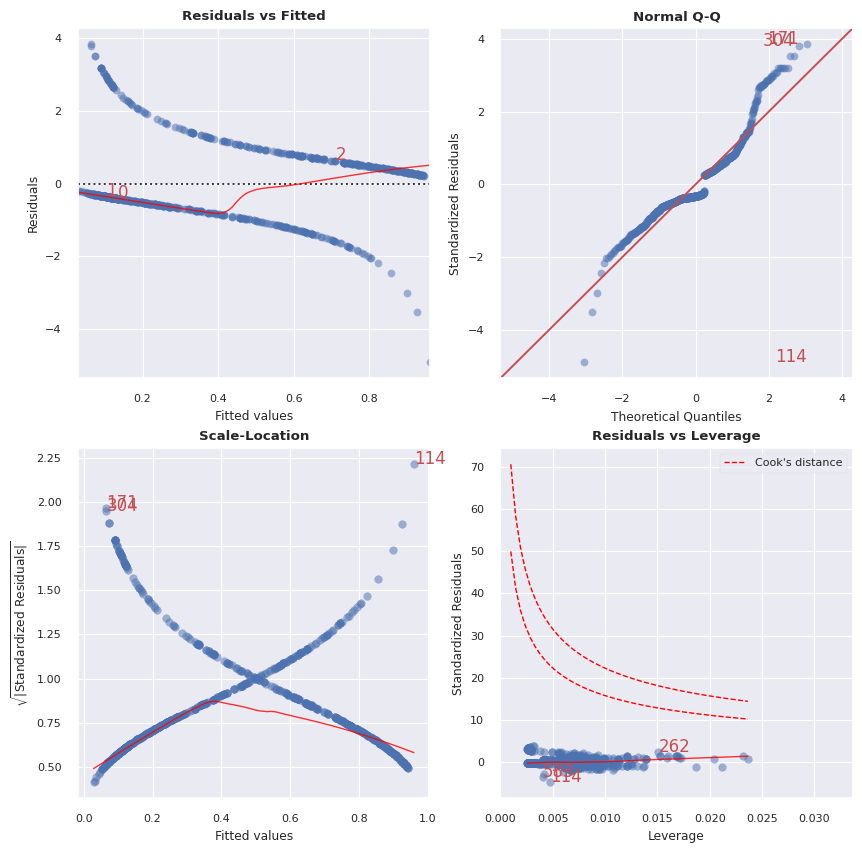

        Features  VIF Factor
1    sex[T.male]        1.03
4        age_num        1.25
2  class_[T.2.0]        1.57
3  class_[T.3.0]        1.82
0      Intercept       13.82


In [27]:
cls = DiagnosticPlots(mod_1)
fig, ax = cls()
plt.show()

All plots look funny. What do you think, is there any problem in the model?


* The **Residuals vs Fitted** plot can help you see, for example, if there are curvilinear trends that you missed. But the fit of a logistic regression is curvilinear by nature, so you can have odd looking trends in the residuals with nothing amiss.
* The **Normal Q-Q** plot helps you detect if your residuals are normally distributed. But the deviance residuals don't have to be normally distributed for the model to be valid, so the normality / non-normality of the residuals doesn't necessarily tell you anything.
* The **Scale-Location** plot can help you identify heteroscedasticity. But logistic regression models are pretty much heteroscedastic by nature.
* The **Residuals vs Leverage** can help you identify possible outliers. But outliers in logistic regression don't necessarily manifest in the same way as in linear regression, so this plot may or may not be helpful in identifying them.

source:https://stats.stackexchange.com/questions/121490/interpretation-of-plot-glm-model


<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

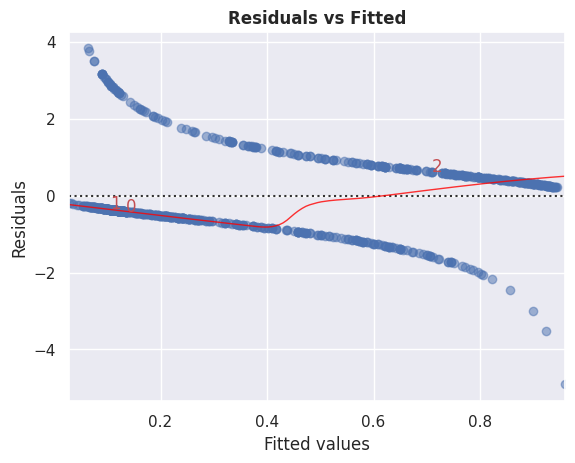

In [28]:
cls.residual_plot()

/tmp/ipykernel_9753/10942233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['resid'] = mod_1.resid_deviance


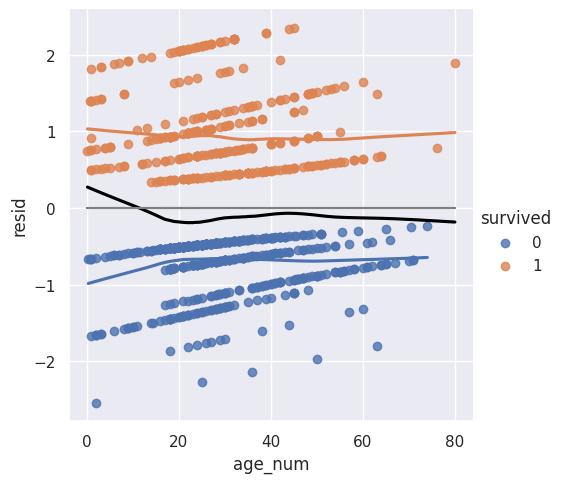

In [29]:
d = data_HW[['age_num', 'survived']]
d['resid'] = mod_1.resid_deviance


sns.lmplot(x='age_num', y='resid', data=d, hue='survived', lowess=True)
sns.regplot(x='age_num', y='resid', data=d, lowess=True, color='black', marker='')
plt.plot(d['age_num'], np.zeros((len(d['age_num']),)), color='grey')

In [30]:
data_HW_mod = data_HW >> \
        mutate(fitted=mod_1.fittedvalues,
               predict = np.where(mod_1.fittedvalues.to_numpy() > 0.5, '1', '0'),
               r_deviance_std = mod_1.resid_deviance,  # standardized by default
               r_pearson_std = mod_1.resid_pearson  # standardized by default
              )
data_HW_mod['predict'] = data_HW_mod['predict'].astype('category') 
data_HW_mod.head()

,survived,survived_num,age,age_num,fare,fare_quantile,fare_quantile2,class_,sex,embarked,fitted,predict,r_deviance_std,r_pearson_std
1161,0,0.0,child,16.0,8.0500,3,"(7.896, 9.841]",3.0,male,S,0.135467,0,-0.539565,-0.395845
933,0,0.0,adult,26.0,8.6625,3,"(7.896, 9.841]",3.0,male,S,0.104951,0,-0.470907,-0.342428
564,1,1.0,adult,40.0,13.0000,4,"(9.841, 14.254]",2.0,female,S,0.709972,1,0.827684,0.639146
1130,0,0.0,adult,18.0,7.7750,2,"(7.75, 7.896]",3.0,female,S,0.648886,1,-1.446820,-1.359440
577,1,1.0,adult,31.0,21.0000,5,"(14.254, 24.15]",2.0,female,S,0.760637,1,0.739728,0.560970


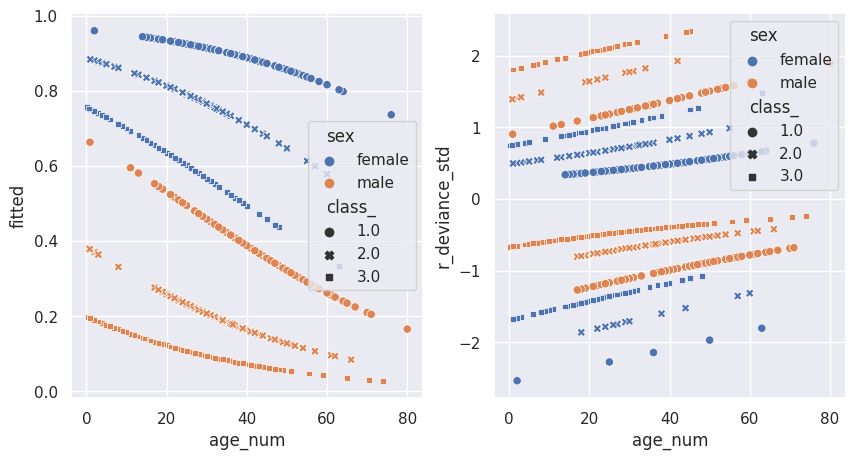

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='age_num', y='fitted', data=data_HW_mod, hue='sex', style='class_', ax=ax[0])
sns.scatterplot(x='age_num', y='r_deviance_std', data=data_HW_mod, hue='sex', style='class_', ax=ax[1])
plt.show()

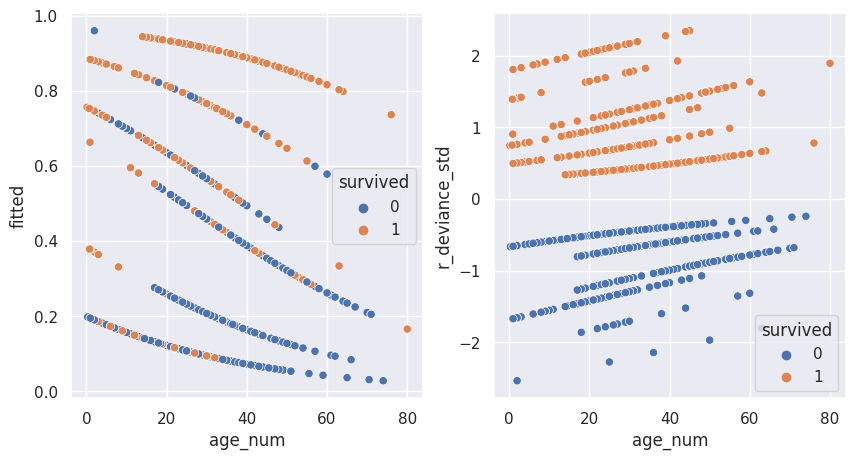

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='age_num', y='fitted', data=data_HW_mod, hue='survived', ax=ax[0])
sns.scatterplot(x='age_num', y='r_deviance_std', data=data_HW_mod, hue='survived', ax=ax[1])
plt.show()

## Post hoc analysis by quality of fitted values

In [33]:
# Fit a  model
pd.crosstab([data_HW_mod.predict],[data_HW.survived])

survived,0,1
predict,,
0,416,102
1,81,238


In [34]:
print(confusion_matrix(y_true=data_HW_mod.survived, y_pred=data_HW_mod.predict))
print(classification_report(y_true=data_HW_mod.survived, y_pred=data_HW_mod.predict))

[[416  81]
 [102 238]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       497
           1       0.75      0.70      0.72       340

    accuracy                           0.78       837
   macro avg       0.77      0.77      0.77       837
weighted avg       0.78      0.78      0.78       837



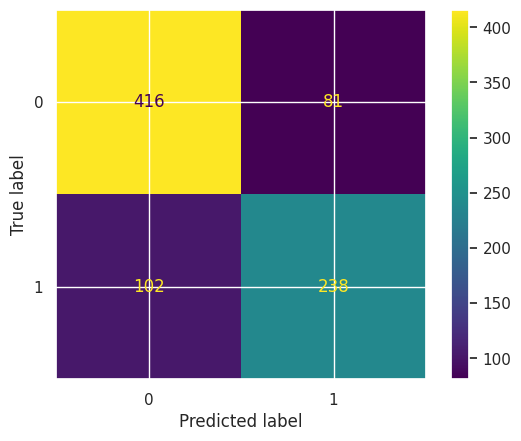

In [35]:
ConfusionMatrixDisplay.from_predictions(data_HW_mod.survived, data_HW_mod.predict)
plt.show()

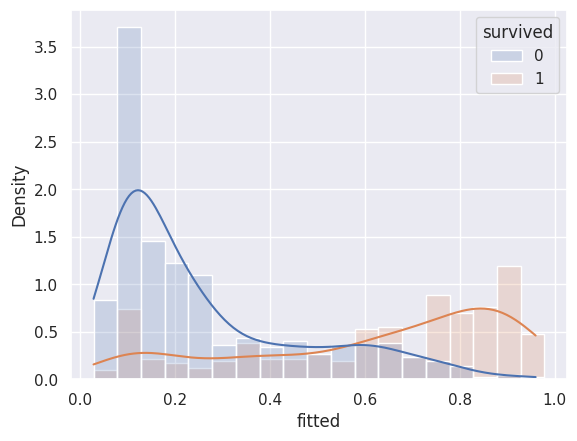

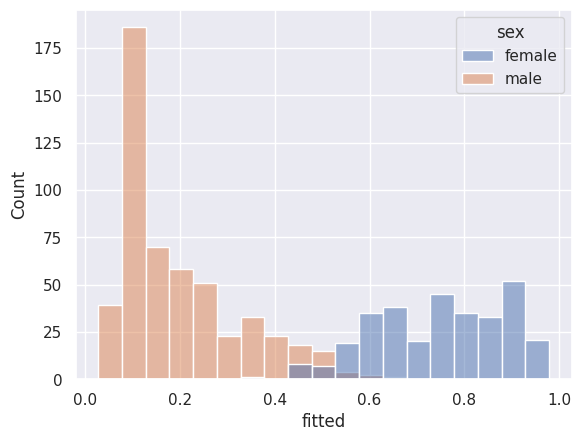

In [36]:
sns.histplot(data=data_HW_mod, x='fitted', hue='survived', alpha=0.2, fill=True, stat='density', kde=True,
            binwidth=0.05)
plt.show()

sns.histplot(data=data_HW_mod, x='fitted', hue='sex', alpha=0.5, fill=True, stat='count', binwidth=0.05)
plt.show()

In [38]:
data_HW_mod = data_HW_mod >> \
        mutate(
               predict_04 = np.where(mod_1.fittedvalues.to_numpy() > 0.4, '1', '0'),
              )
data_HW_mod['predict'] = data_HW_mod['predict'].astype('category') 

print(data_HW_mod.head())
print(print(confusion_matrix(y_true=data_HW_mod.survived, y_pred=data_HW_mod.predict_04)))

     survived  survived_num    age  age_num     fare fare_quantile  \
1161        0           0.0  child     16.0   8.0500             3   
933         0           0.0  adult     26.0   8.6625             3   
564         1           1.0  adult     40.0  13.0000             4   
1130        0           0.0  adult     18.0   7.7750             2   
577         1           1.0  adult     31.0  21.0000             5   

       fare_quantile2 class_     sex embarked    fitted predict  \
1161   (7.896, 9.841]    3.0    male        S  0.135467       0   
933    (7.896, 9.841]    3.0    male        S  0.104951       0   
564   (9.841, 14.254]    2.0  female        S  0.709972       1   
1130    (7.75, 7.896]    3.0  female        S  0.648886       1   
577   (14.254, 24.15]    2.0  female        S  0.760637       1   

      r_deviance_std  r_pearson_std predict_04  
1161       -0.539565      -0.395845          0  
933        -0.470907      -0.342428          0  
564         0.827684       0.

In [39]:
(392+265)/(392 + 265 + 104+ 73 ) # Accuracy from Confusion Matrix

0.7877697841726619

## Use test data

In [40]:
titanic_test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
198,1.0,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1.0,0.0,113773,53.1000,D30,S,10,NaN,"New York, NY",1
72,1.0,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1.0,0.0,13508,136.7792,C89,C,4,NaN,"Los Angeles, CA",1
1089,3.0,"Olsvigen, Mr. Thor Anderson",male,20.0,0.0,0.0,6563,9.2250,None,S,None,89.0,"Oslo, Norway Cameron, WI",0
838,3.0,"Gustafsson, Mr. Johan Birger",male,28.0,2.0,0.0,3101277,7.9250,None,S,None,NaN,"Ruotsinphytaa, Finland New York, NY",0
1010,3.0,"McNamee, Mr. Neal",male,24.0,1.0,0.0,376566,16.1000,None,S,None,NaN,None,0


In [41]:
data_test = titanic_test[['age', 'sex', 'pclass', 'fare', 'embarked']] >> \
            filter_by(titanic_test.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = titanic_test.survived,
                      survived_num = titanic_test.survived.astype('float'),
                      age = pd.cut(titanic_test.age,(-np.inf, 16, np.inf), labels=["child","adult"]),
                      age_num = titanic_test.age,
                      fare = titanic_test.fare,
                      fare_quantile = pd.qcut(titanic_test.fare, q=8, labels=list(range(1, 9))),
                      fare_quantile2 = pd.qcut(titanic_test.fare, q=np.linspace(0, 1, 9)),
                      class_ = titanic_test.pclass.astype('category'),
                      sex = titanic_test.sex.astype('category'),
                      embarked = titanic_test.embarked.astype('category')) 

data_test = data_test.dropna(axis=0, how='any')  # `axis=0` stands for per index (row)
print(data_test.describe(include='all'))
print(data_test.info())
#data_test.head()

       survived  survived_num    age     age_num        fare  fare_quantile  \
count       206    206.000000    206  206.000000  206.000000          206.0   
unique        2           NaN      2         NaN         NaN            8.0   
top           0           NaN  adult         NaN         NaN            2.0   
freq        121           NaN    177         NaN         NaN           33.0   
mean        NaN      0.412621    NaN   29.904531   38.167171            NaN   
std         NaN      0.493505    NaN   15.284936   58.829694            NaN   
min         NaN      0.000000    NaN    0.416700    0.000000            NaN   
25%         NaN      0.000000    NaN   20.000000    8.050000            NaN   
50%         NaN      0.000000    NaN   29.000000   17.700000            NaN   
75%         NaN      1.000000    NaN   39.000000   36.067700            NaN   
max         NaN      1.000000    NaN   70.000000  512.329200            NaN   

       fare_quantile2  class_   sex embarked  
coun

     survived  survived_num    age  age_num     fare fare_quantile  \
1240        1           1.0  child   0.4167   8.5167             3   
658         1           1.0  child   0.7500  19.2583             5   
611         1           1.0  child   0.8333   9.3500             3   
359         1           1.0  child   0.8333  29.0000             6   
1187        1           1.0  child   1.0000  16.7000             5   

        fare_quantile2 class_     sex embarked    fitted predict  
1240    (8.05, 10.495]    3.0    male        C  0.197551       0  
658     (15.5, 24.349]    3.0  female        C  0.752923       1  
611     (8.05, 10.495]    3.0    male        S  0.195644       0  
359   (24.349, 31.275]    2.0    male        S  0.378760       0  
1187    (15.5, 24.349]    3.0  female        S  0.751572       1  


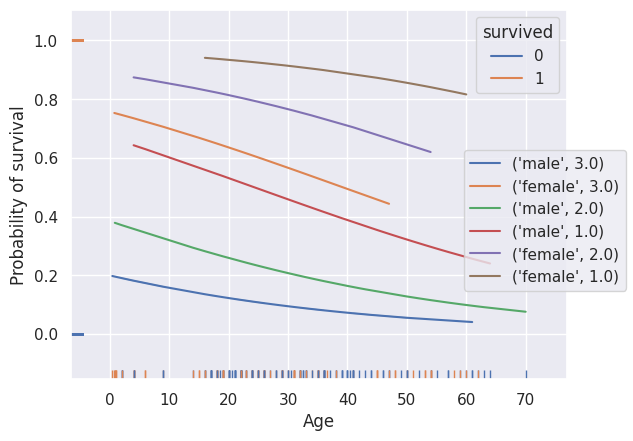

In [42]:
data_test = data_test >> \
        mutate(fitted=mod_1.predict(exog = data_test, linear=False),
               predict = np.where(mod_1.predict(exog = data_test, linear=False).to_numpy() > 0.5, '1', '0') 
              ) >> \
        arrange(data_test.age_num)

data_test['predict'] = data_test['predict'].astype('category') 
print(data_test.head())

fig, ax = plt.subplots()
sns.lineplot(data=data_test, x='age_num', y='fitted', hue=data_test[['sex', 'class_']].apply(tuple, axis=1), ax=ax)
sns.rugplot(data=data_test, x='age_num', y='survived_num', hue='survived', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Probability of survival')
fig.legend(loc='center right')


plt.show()

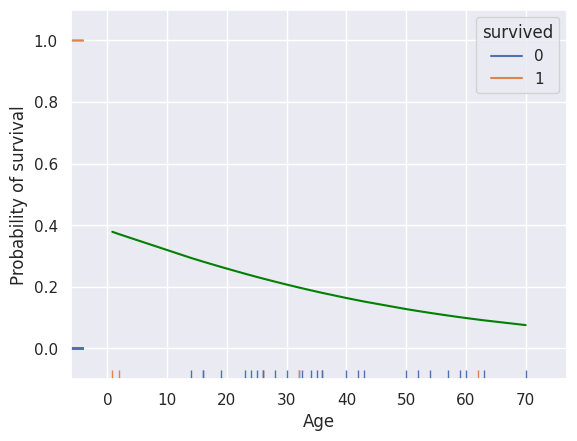

In [43]:
data_test_select = data_test[(data_test.sex == 'male') & (data_test.class_ == 2)]

fig, ax = plt.subplots()
sns.lineplot(data=data_test_select, x='age_num', y='fitted', ax=ax, color='green')
sns.rugplot(data=data_test_select, x='age_num', y='survived_num', hue='survived', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Probability of survival')



plt.show()

Wrong way to plot confidence interval

In [ ]:
## add standard errors and compute a 95% interval the wrong way

# unfortunately there is not such parameter to calculate `se.fit` so we need perform calculation by hand

se_fit = []
for _, row in data_test_select[['age_num']].iterrows():
    vec = np.array([1, 1, 1, 0, row['age_num']])
    se_fit.append(np.sqrt(vec @ model_1.cov_params().to_numpy() @ vec.T))
se_fit = np.array(se_fit)

# not sure it it is correct
se_fit = np.sqrt(mod_1.model.family.variance(mod_1.predict(data_test_select, linear=False)))

data_test_select = data_test_select >> \
  mutate(wrong_se = se_fit, #se_fit,
         wrong_upr = data_test_select.fitted + (2 * se_fit),
         wrong_lwr = data_test_select.fitted - (2 * se_fit))

plt + geom_ribbon(data = data_test_select, aes(ymin = wrong_lwr, ymax = wrong_upr),
                  alpha = 0.1)

fig, ax = plt.subplots()
sns.lineplot(data=data_test_select, x='age_num', y='fitted', ax=ax, color='green', 
             errorbar=lambda x: data_test_select)
sns.rugplot(data=data_test_select, x='age_num', y='survived_num', hue='survived', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Probability of survival')



plt.show()


# TODO this is not working and all bellow is pending

Right way  \TODO all bellow is pending\

In [ ]:
#predict(mod_1, data_test_select, se.fit = TRUE)
np.sqrt(mod_1.model.family.variance(mod_1.predict(data_test_select, linear=False)))

In [ ]:
ilink = family(mod_1)$linkinv
quant_t = qt(0.025, df = df.residual(mod_1), lower.tail = FALSE)
quant_n = qnorm(0.005, lower.tail = FALSE)
## add fit and se.fit on the **link** scale
data_test_select = data_test_select %>%
   mutate(fit_link = predict(mod_1, data_test_select, se.fit = TRUE)$fit,
          se_link  = predict(mod_1, data_test_select, se.fit = TRUE)$se.fit,
          fit  = ilink(fit_link),
          fit_ul = ilink(fit_link + (quant_n * se_link)),
          fit_ll = ilink(fit_link - (quant_n * se_link)))
## show
head(data_test_select)

plt + geom_ribbon(data = data_test_select,
                  aes(ymin = fit_ll, ymax = fit_ul),
                  alpha = 0.1)



Binary classification

https://en.wikipedia.org/wiki/Binary_classification

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

https://en.wikipedia.org/wiki/Receiver_operating_characteristic



In R many different packages:  /TODO prepare for Python/

https://rviews.rstudio.com/2019/03/01/some-r-packages-for-roc-curves/

https://cran.r-project.org/web/packages/ROCit/index.html

https://cran.r-project.org/web/packages/pROC/index.html

https://cran.r-project.org/web/packages/ROCR/

In [ ]:
install.packages("pROC")
library(pROC)

Intro with pROC: https://rpubs.com/Wangzf/pROC

In [ ]:
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,          # data
         percent = TRUE,                    # show all values in percent
         #partial.auc=c(100, 90), 
         #partial.auc.correct=True,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         #print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         #print.auc.col = "#1c61b6",
         #auc.polygon = TRUE, 
         #auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         #max.auc.polygon = TRUE, 
         #max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")



In [ ]:
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,          # data
         percent = TRUE,                    # show all values in percent
         partial.auc=c(100, 90), 
         partial.auc.correct=TRUE,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         print.auc.col = "#1c61b6",
         auc.polygon = TRUE, 
         auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,
         percent = TRUE, 
         add = TRUE, 
         type = "n",                        # add to plot, but don't re-add the ROC itself (useless)
         partial.auc = c(100, 90), 
         partial.auc.correct = TRUE,
         partial.auc.focus = "se",          # focus pAUC on the sensitivity
         print.auc = TRUE, 
         print.auc.pattern = "Corrected pAUC (100-90%% SE):\n%.1f%%", 
         print.auc.col = "#008600",
         print.auc.y = 40,                  # do not print auc over the previous one
         auc.polygon = TRUE, 
         auc.polygon.col = "#008600",
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#00860022")

In [ ]:
install.packages("ROCR")
library(ROCR)
pr = prediction(data_HW_mod$fitted, data_HW_mod$survived)
prf = performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)
#? performance
auc = performance(pr, measure = "auc")
auc = auc@y.values[[1]]
auc

## Your Turn :

* Compute a new variable `nrelatives = sibsp + parch`
* Fit model with this new variable (you can try use it as continuous or as factor (change levels)) and `sex, age, fare, class, embarked`
* Try to use `step` function to find the "best" model.
* Validate the model. Are all variables significant? If you have any numerical variable, does it need any transformation?
* Plot densities of fitted probabilities for survived/not survived and choose optimal threshold.
* Compute the confusion matrix and basic statistics and compare results of your model with model mod_1
* Plot ROC curve of your model together with ROC curve of mod_1. Which one has larger AUC.